# MACHINE LEARNING PROJECT : -  PREDICT INSURANCE COST



Realise by Mr. Ray Nangaa Bakaato : Junior Data Scientist                                     ------------      Date : 11th August.  

#### ----------------------------------------Let Get Started--------------------------------------------------

### A. Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import joblib

### B. Loading Data in Pandas Datafram

In [6]:
data = pd.read_csv("/Users/raymondbakaato/Documents/GITHUB-LINKIND-PROFILE PROJECT/MACHINE_LEARNING_INSURANCE_COST_PREDICTION/INSURANCE_DATASET.csv")

### 1. Display Top 5 Rows of The Dataset

In [9]:
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2. Check Last 5 Rows of The Dataset


In [12]:
data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603



### 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)


In [15]:
data.shape

(1338, 7)

In [17]:
print("Number of Rows: ", data.shape[0] )
print("Number of Columns: ", data.shape[1])

Number of Rows:  1338
Number of Columns:  7


### 4. Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 5. Check Null Values In The Dataset


In [23]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### 6. Get Overall Statistics About The Dataset

#### --- A. Descriptive Statistic

In [27]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### --- B. Covert Columns From String ['sex','smoker', 'region' ] To Numerical Values

In [30]:
data["sex"].unique()

array(['female', 'male'], dtype=object)

In [32]:
data["sex"] = data["sex"].str.lower().map({"female": 0, "male": 1})

In [34]:
data["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [36]:
data["smoker"] = data["smoker"].str.lower().map({"no": 0, "yes": 1})

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [40]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [42]:
data["region"] = data["region"].str.lower().map(
    {
        "southwest": 1,
        "southeast": 2,
        "northwest": 3,
        "northeast": 4
   }
)

In [44]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,4,6406.41070
9,60,0,25.840,0,0,3,28923.13692


### 8. Store Feature Matrix In X and Response(Target) In Vector y


In [47]:
# Feature Matrix assigned in X
X = data.drop("charges", axis = 1)

In [49]:
# Target Variable Assigned in the  Vector Y
y = data["charges"]

### 9. Train/Test split


In [52]:
# - Split data into two-part: a training set and a testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### 10. Model Training


##### ---- A. Linear Regression

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

##### ---- B. Random Forest Classifier

In [59]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

##### ---- C. Support Vecteur Machine SVM

In [62]:
svm = SVR()
svm.fit(X_train,  y_train)

SVR()

##### ---- D. Gradient Booting Regressor

In [65]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

### 11. Prediction on Test Data


In [68]:
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_gbr = gbr.predict(X_test)

### 12. Compare Performance Visually 


In [71]:
df = pd.DataFrame({
    "Actual": y_test,
    "LinearR" : y_pred_lr,
    "RandomF" : y_pred_rf,
    "SVM": y_pred_svm,
    "GBRegressor" : y_pred_gbr
})

In [73]:
df.head()

,Actual,LinearR,RandomF,SVM,GBRegressor
764,9095.06825,8924.407244,11540.720813,9548.261584,11001.128629
887,5272.17580,7116.295018,5288.358887,9492.515425,5840.174656
890,29330.98315,36909.013521,28363.449543,9648.758701,28001.980112
1293,9301.89355,9507.874691,10676.612760,9555.044136,9745.291602
259,33750.29180,27013.350008,34550.946996,9420.421978,33639.100981


### 13. Evaluating the Algorithm
#### -----Let Comparare Our 10 first Actual Values with each Model using Plot

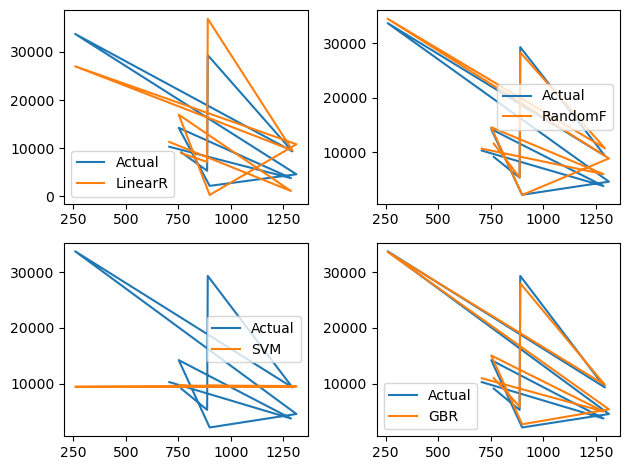

In [76]:
plt.subplot(221)
plt.plot(df["Actual"].iloc[0:10],label="Actual")
plt.plot(df["LinearR"].iloc[0:10],label="LinearR")
plt.legend()

plt.subplot(222)
plt.plot(df["Actual"].iloc[0:10], label="Actual")
plt.plot(df["RandomF"].iloc[0:10], label="RandomF")
plt.legend()

plt.subplot(223)
plt.plot(df["Actual"].iloc[0:10],label="Actual")
plt.plot(df["SVM"].iloc[0:10],label="SVM")
plt.legend()

plt.subplot(224)
plt.plot(df["Actual"].iloc[0:10], label="Actual")
plt.plot(df["GBRegressor"].iloc[0:10], label="GBR")
plt.legend()

plt.tight_layout()
plt.show()

##### ----- As We Can Obeserve Gradient Boost Regressor is the Best Model

#### Let Use Metrics To Evaluate Our Models

##### Root Mean Squared Error (RMSE)

In [81]:
r2_1 =  r2_score(y_test, y_pred_lr)
r2_2 =  r2_score(y_test, y_pred_rf)
r2_3 =  r2_score(y_test, y_pred_svm)
r2_4 =  r2_score(y_test, y_pred_gbr)
print(r2_1,r2_2,r2_3,r2_4)

0.7833463107364539 0.8636801918638342 -0.07229762787861826 0.8779936181637191


##### Mean Absolute Error (MAE)

In [84]:
rsq_1 =  mean_squared_error(y_test, y_pred_lr)
rsq_2 =  mean_squared_error(y_test, y_pred_rf)
rsq_3 =  mean_squared_error(y_test, y_pred_svm)
rsq_4 =  mean_squared_error(y_test, y_pred_gbr)
print(rsq_1,rsq_2,rsq_3,rsq_4)

33635210.431178406 21163477.290341698 166472846.50979328 18941336.013983566


### 14. Predict Charge For New Customer

##### Let Creat a Sample Dataset To Test Our Model

In [88]:
df_ex = pd.DataFrame({
    	"age":40,
        "sex":1,
        "bmi":40.30,
        "children":2,
        "smoker":1,
    	"region": 2	
}, index=[0])

In [90]:
df_ex

,age,sex,bmi,children,smoker,region
0,40,1,40.3,2,1,2


In [92]:
new_pred = gbr.predict(df_ex)
print(new_pred)

[43279.35070251]


### 15. Save Model Usign Joblib

##### After Training Our Model We've Descovered Grandien Boosting Regressor is the Best model
##### now let Us Train Our Model Grandien Boosting Regressor In entire Dataset
##### Before We Had Used Only  80% Of Our Dataset For Trainind and 20% for Testing, Now we will use 100% for Training.

In [96]:
gbr = GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

#### ---- Save Our Model

In [99]:
joblib.dump(gbr, "model_joblib_bgr")

['model_joblib_bgr']

In [101]:
model = joblib.load("model_joblib_bgr")

In [103]:
model.predict(df_ex)

array([42035.6725726])

In [105]:
df_ex

,age,sex,bmi,children,smoker,region
0,40,1,40.3,2,1,2


### 16. Graphic User Interface GUI

In [108]:
from tkinter import *
import joblib

In [110]:
def show_entry():
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())

    model = joblib.load("model_joblib_bgr")
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    Label(master, text="Insurance Cost: ").grid(row=8)
    Label(master, text=result).grid(row=8, column=1)

master = Tk()
master.title("Machine Learning Model")
label = Label(master, text= "Insurance Cost Prediction", bg="gray", fg="White").grid(row=0, columnspan=2)

Label(master, text = "Enter Your Age").grid(row=1)
Label(master, text = "Male or Female [1/0]").grid(row=2)
Label(master, text = "Enter Your BMI Value").grid(row=3)
Label(master, text = "Enter Number Of Children").grid(row=4)
Label(master, text = "Smoker Yes/No").grid(row=5)
Label(master, text = "Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)

Button(master, text="Predict", command=show_entry).grid(row=7)


master.mainloop()

# MACHINE LEARNING PROJECT : -  PREDICT INSURANCE COST

#### Realise by 
##### Mr. Ray Nangaa Bakaato : Junior Data Scientist 